In [1]:
import pandas as pd
import numpy as np
from plotnine import (
    ggplot,
    aes,
    geom_path,
    geom_point,
    geom_col,
    labs,
    scale_color_discrete,
    scale_fill_discrete,
    guides,
    guide_legend,
)

Make some data

In [2]:
n = 9
df = pd.DataFrame(
    {
        "x": np.arange(1, n+1),
        "y": np.arange(1, n+1),
        "yfit": np.arange(1, n+1) + np.tile([-0.2, 0, 0.2], n // 3),
        "cat": ["a", "b", "c"] * (n // 3),
    }
)

Draw an initial plot.

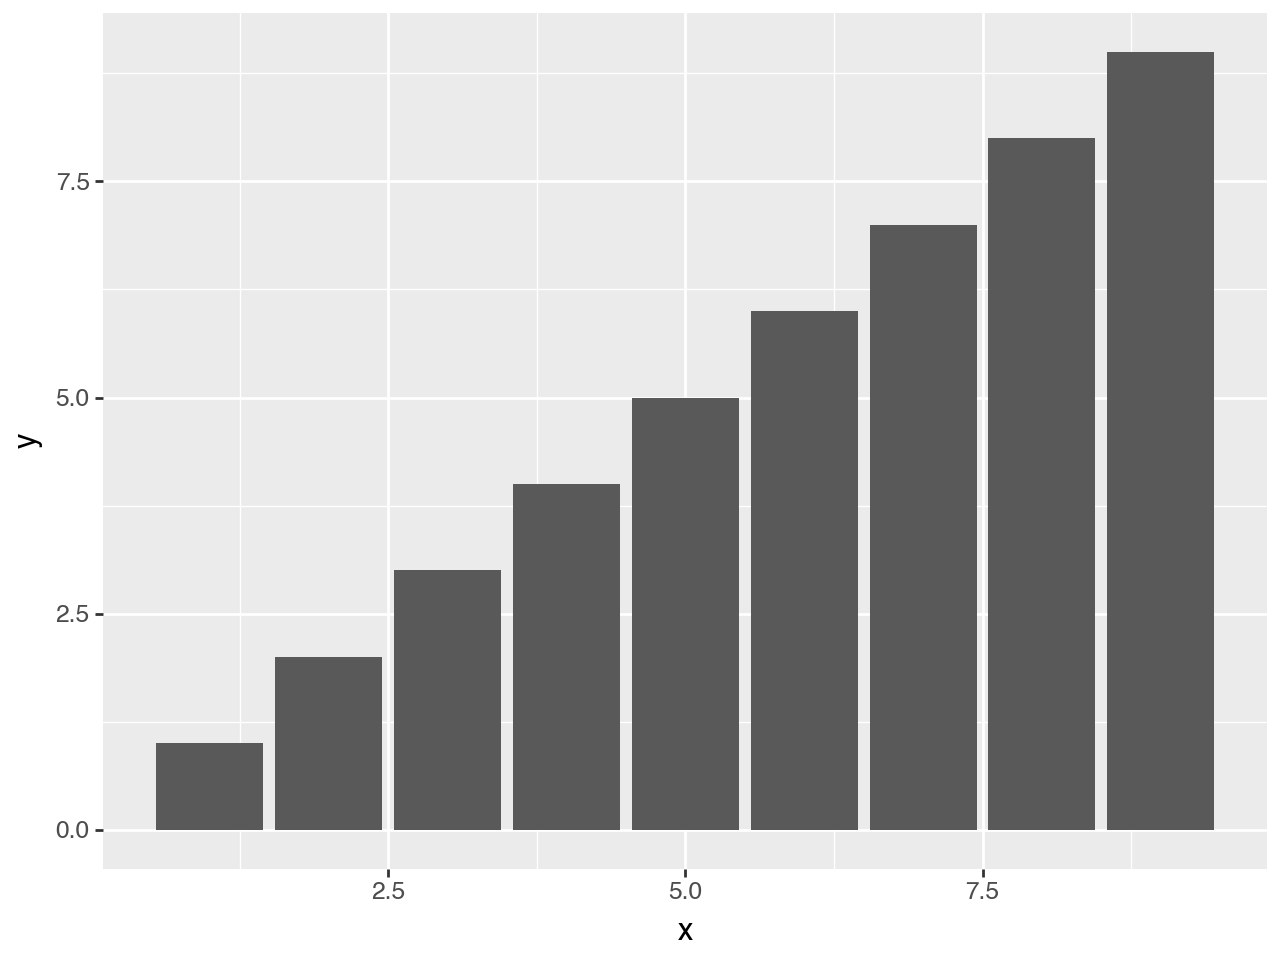

In [3]:
(
    ggplot(df)
    + geom_col(aes("x", "y"))
)

Mapping the `fill` to a discrete variable uses the default color palette from the `scale_fill_discrete`

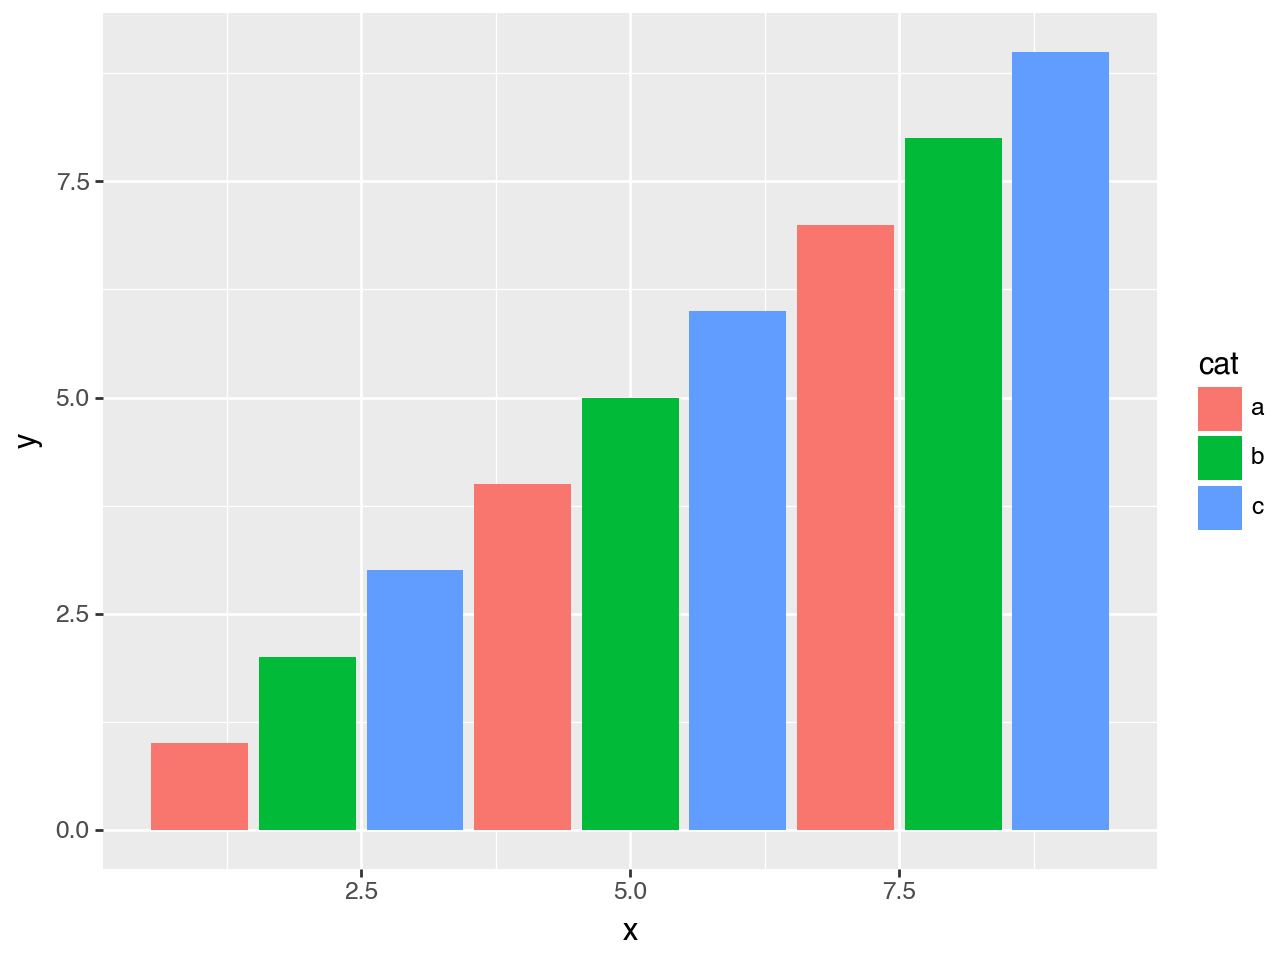

In [4]:
(
    ggplot(df)
    + geom_col(aes("x", "y", fill="cat")) # changed
)

Assuming we want to visualise a "model" on top of the data. We could add this model data as points and a path through the points. 

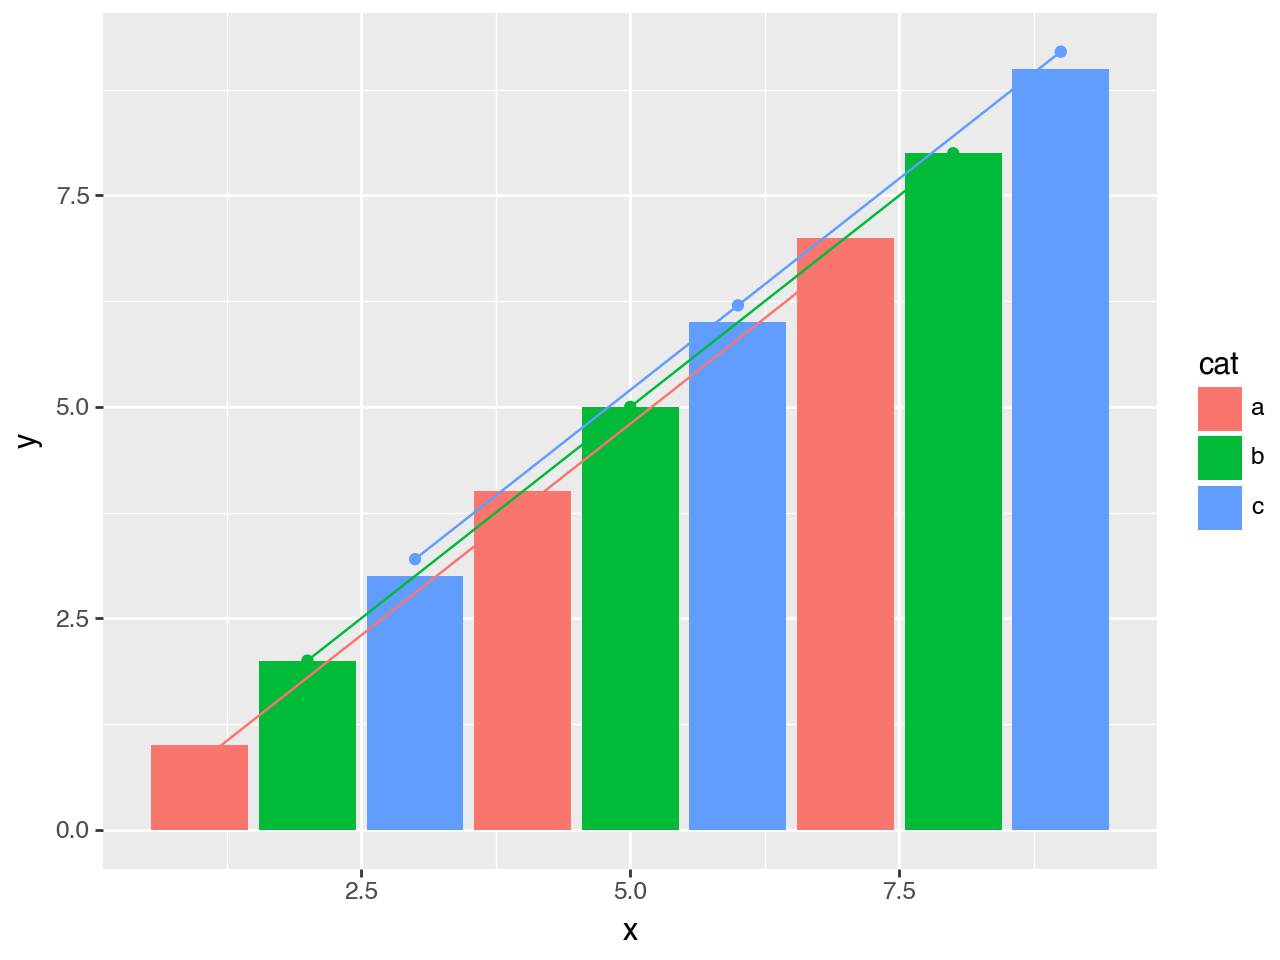

In [5]:
(
    ggplot(df)
    + geom_col(aes("x", "y", fill="cat"))
    + geom_point(aes("x", y="yfit", color="cat"))  # new
    + geom_path(aes("x", y="yfit", color="cat"))   # new
)

There is a clash of colors between the actual data (the bars) and the fitted model (the points and lines). A simple solution is to adjust the colors of the fitted model slightly. We do that by varying the lightness of the default color scale, make them a little darker.

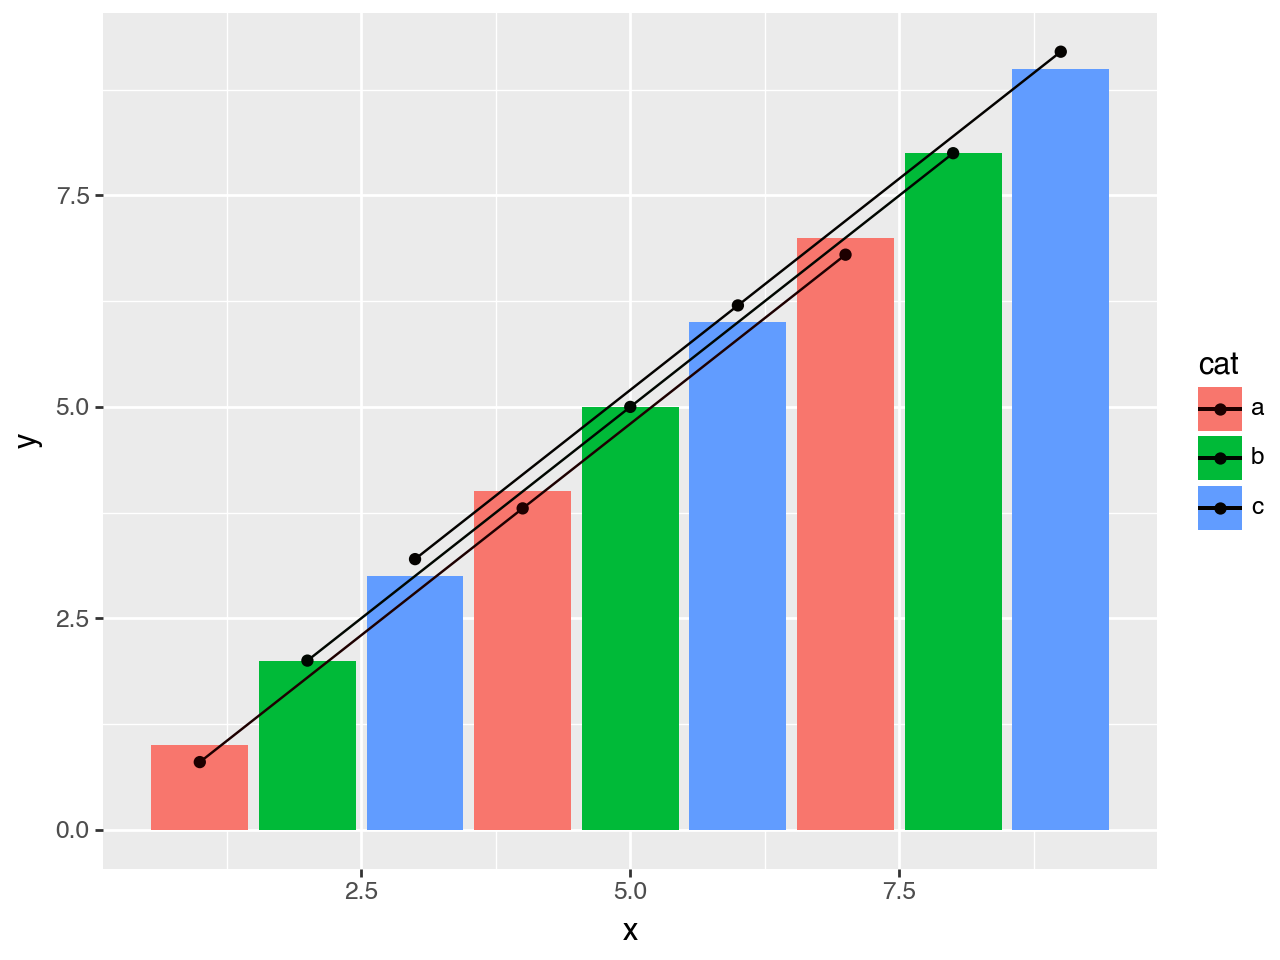

In [6]:
(
    ggplot(df)
    + geom_col(aes("x", "y", fill="cat"))
    + geom_point(aes("x", y="yfit", color="cat"))
    + geom_path(aes("x", y="yfit", color="cat"))
    + scale_color_discrete(l=0.4)   # new
)

There are two main pieces of information in the plot, but we a single combined legend. Since we use separate aesthetics for the actual data and fitted model, we can have distinct legends for both by giving a name to the scales associated with each.

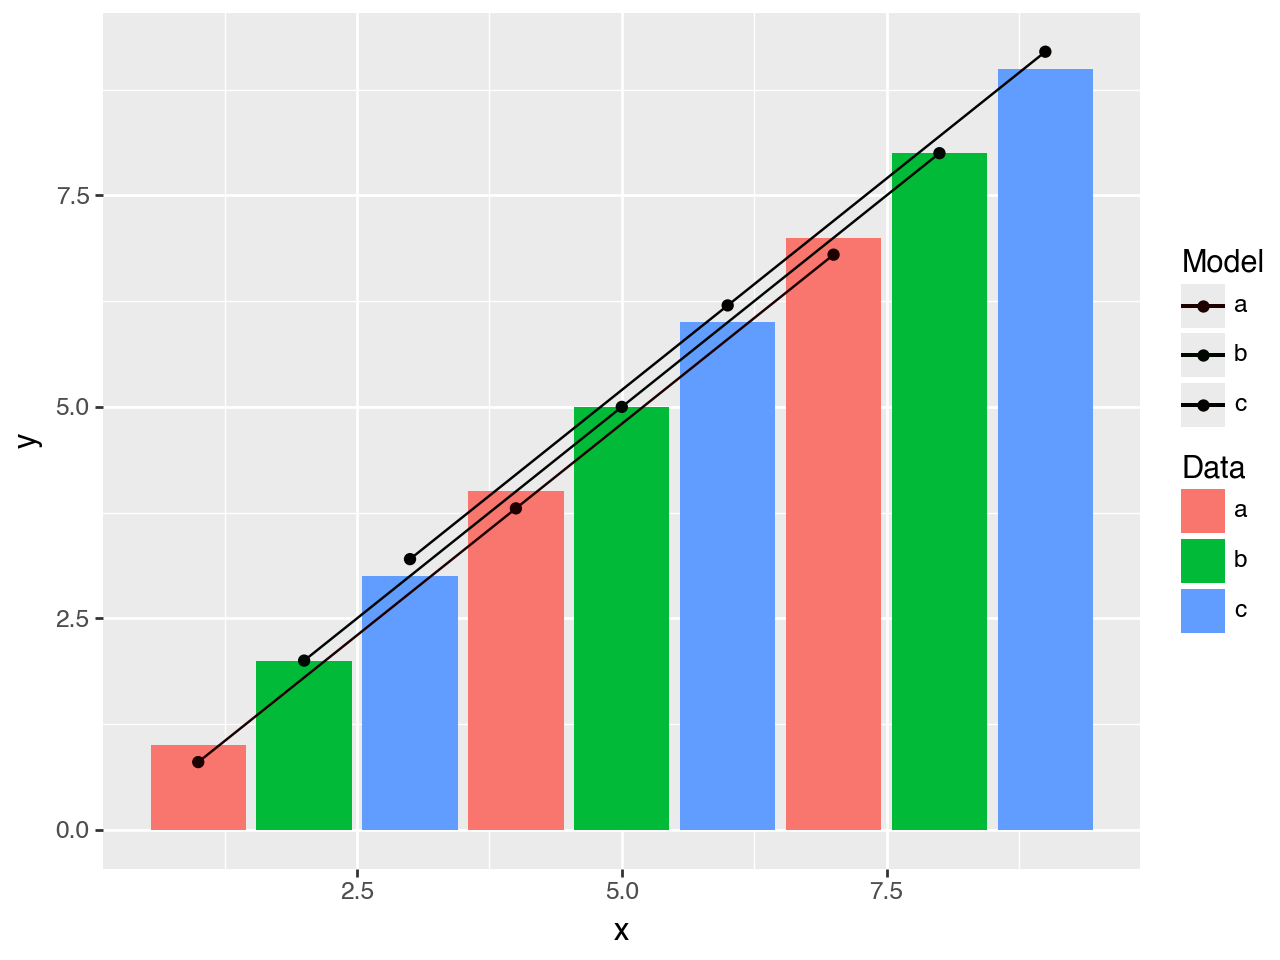

In [7]:
(
    ggplot(df)
    + geom_col(aes("x", "y", fill="cat"))
    + geom_point(aes("x", y="yfit", color="cat"))
    + geom_path(aes("x", y="yfit", color="cat"))
    + scale_color_discrete(l=0.4, name="Model") # modified
    + scale_fill_discrete(name="Data")          # new
)

Alternatively, we could use the `labs` class to set the names.

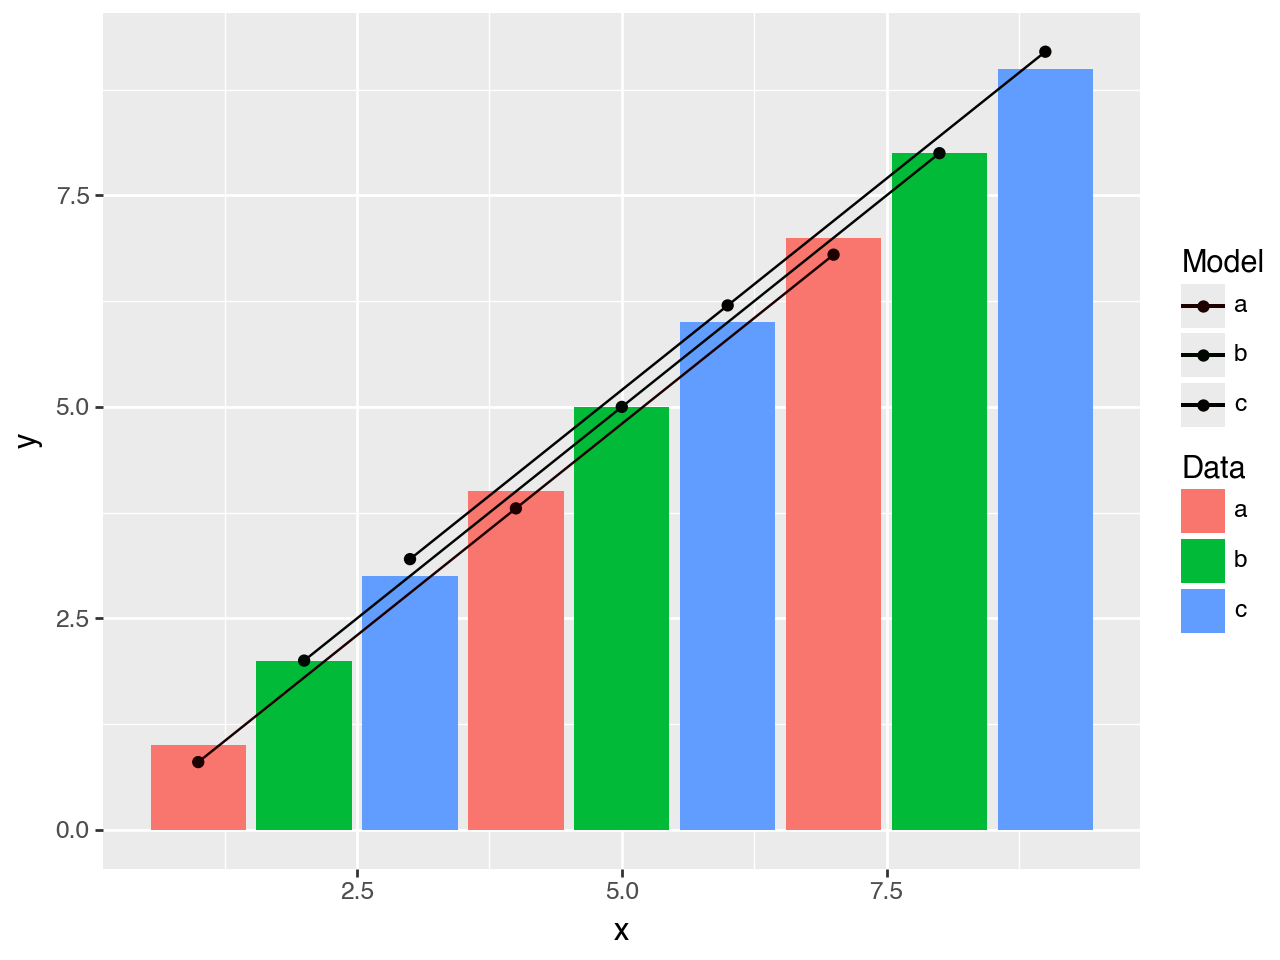

In [8]:
(
    ggplot(df)
    + geom_col(aes("x", "y", fill="cat"))
    + geom_point(aes("x", y="yfit", color="cat"))
    + geom_path(aes("x", y="yfit", color="cat"))
    + scale_color_discrete(l=0.4)
    + labs(fill="Data", color="Model") # new
)

Or we could use `guide_legend` to rename the titles of the legends.

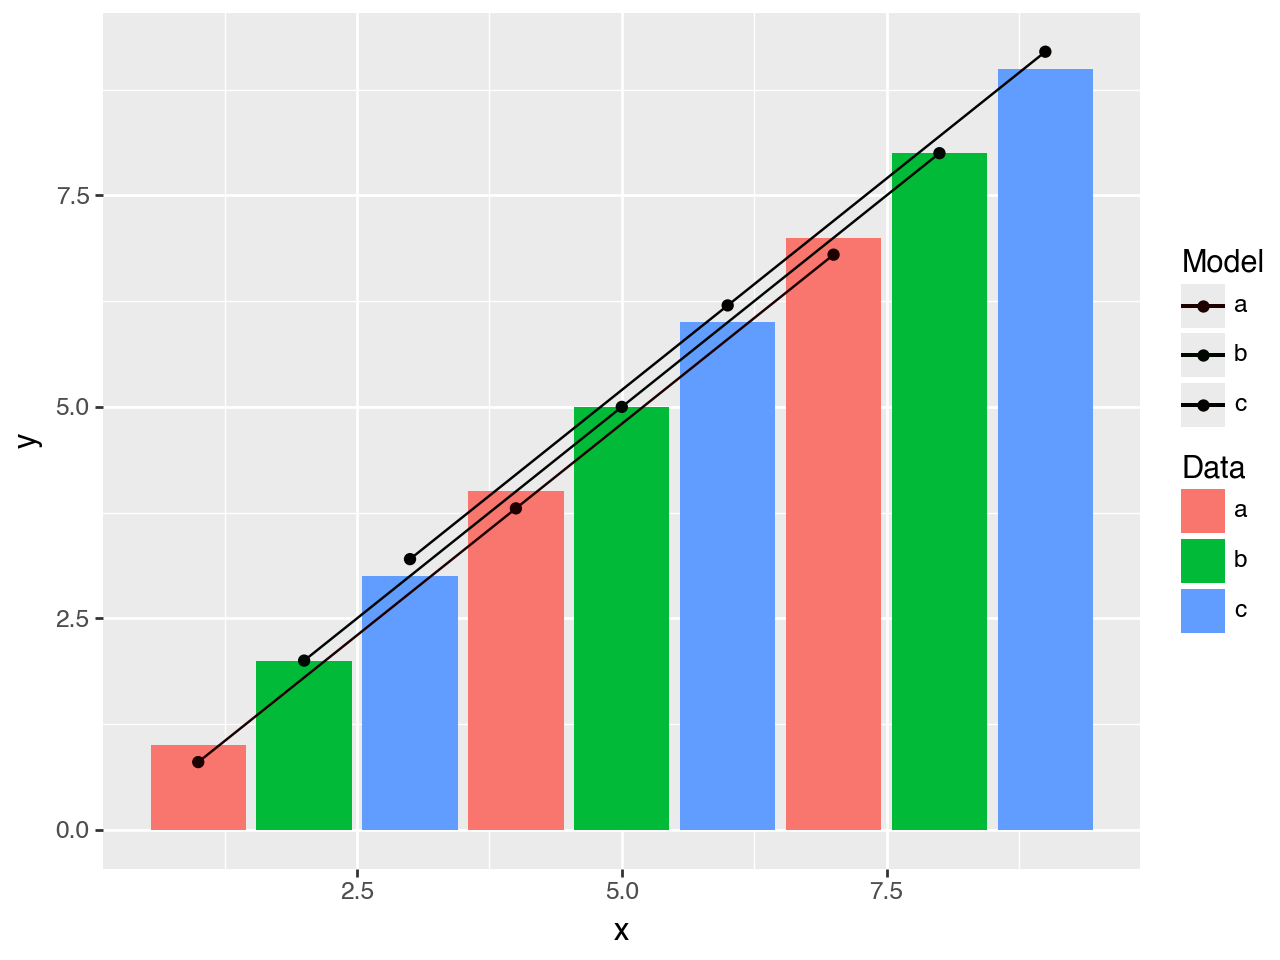

In [9]:
(
    ggplot(df)
    + geom_col(aes("x", "y", fill="cat"))
    + geom_point(aes("x", y="yfit", color="cat"))
    + geom_path(aes("x", y="yfit", color="cat"))
    + scale_color_discrete(l=0.4)
    + guides( # new
        fill=guide_legend(title="Data"), color=guide_legend(title="Model")
    )
)